# Comparing edge-based and region-based segmentation

Text(0.5, 1.0, 'histogram of gray values')

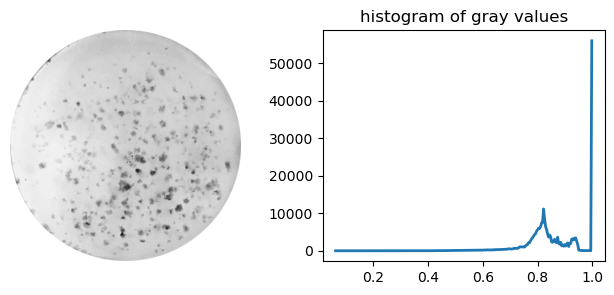

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.exposure import histogram

img = imread('images/27 NC.tif', as_gray=True)
hist, hist_centers = histogram(img)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

## Thresholding

In [2]:
low = 0.65
high = 0.75
min_size = 20

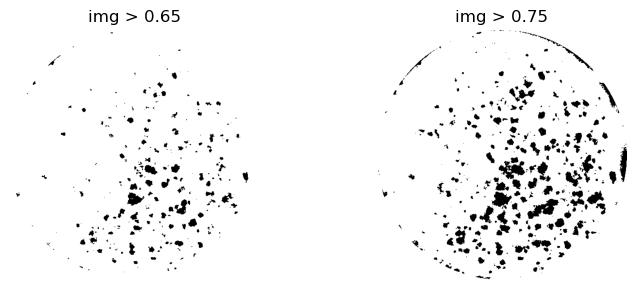

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].imshow(img > low, cmap=plt.cm.gray)
axes[0].set_title(f'img > {low}')

axes[1].imshow(img > high, cmap=plt.cm.gray)
axes[1].set_title(f'img > {high}')

for a in axes:
    a.axis('off')

plt.tight_layout()

## Edge-based segmentation

(-0.5, 514.5, 514.5, -0.5)

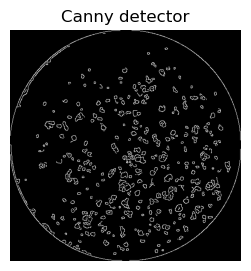

In [4]:
from skimage.feature import canny

edges = canny(img)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('Canny detector')
ax.axis('off')

These contours are then filled using mathematical morphology.



(-0.5, 514.5, 514.5, -0.5)

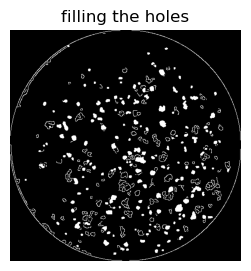

In [5]:
from scipy import ndimage as ndi

fill_img = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_img, cmap=plt.cm.gray)
ax.set_title('filling the holes')
ax.axis('off')

Small spurious objects are easily removed by setting a minimum size for
valid objects.



(-0.5, 514.5, 514.5, -0.5)

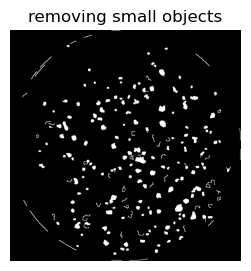

In [6]:
from skimage import morphology

img_cleaned = morphology.remove_small_objects(fill_img, min_size)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(img_cleaned, cmap=plt.cm.gray)
ax.set_title('removing small objects')
ax.axis('off')

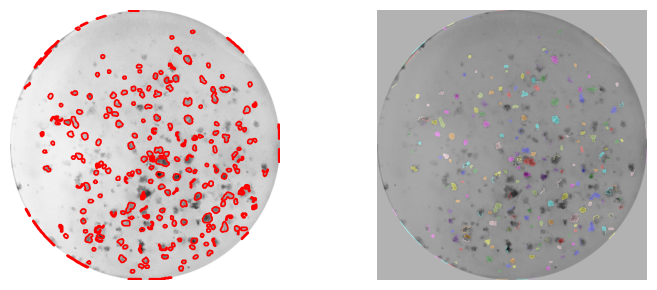

In [7]:
from skimage.color import label2rgb

labeled_img, n = ndi.label(img_cleaned)
image_label_overlay = label2rgb(labeled_img, image=img, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].contour(labeled_img, [0.5], linewidths=1.2, colors='r')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()

In [8]:
n

218

## Region-based segmentation

(-0.5, 514.5, 514.5, -0.5)

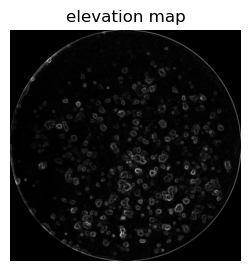

In [9]:
from skimage.filters import sobel

elevation_map = sobel(img)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

Find markers of the background and the foreground based on the extreme parts of the histogram of gray values.

(-0.5, 514.5, 514.5, -0.5)

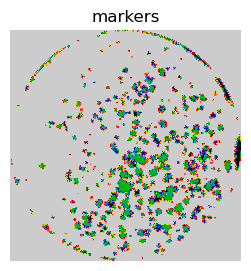

In [10]:
markers = np.zeros_like(img)
markers[img < low] = 1
markers[img > high] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

Use the watershed transform to fill regions of the elevation map starting from the markers determined above:

/tmp/ipykernel_680986/4058004327.py:4: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  segmentation_img = morphology.remove_small_objects(segmentation_img, min_size)


(-0.5, 514.5, 514.5, -0.5)

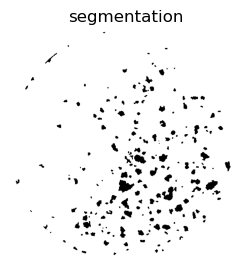

In [11]:
from skimage import segmentation

segmentation_img = segmentation.watershed(elevation_map, markers) - 1
segmentation_img = morphology.remove_small_objects(segmentation_img, min_size)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_img, cmap=plt.cm.gray)
ax.set_title('segmentation')
ax.axis('off')

This last method works even better, and the foreground can be segmented and
labeled individually.

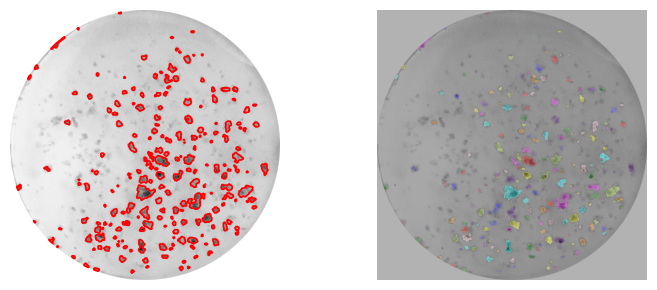

In [12]:
from skimage.color import label2rgb

labeled_img, n = ndi.label(1 - segmentation_img)
image_label_overlay = label2rgb(labeled_img, image=img, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].contour(segmentation_img, [0.5], linewidths=1.2, colors='r')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()

In [13]:
n

206